In [422]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
import math
import statsmodels.api as sm
import pandas as pd

Code is not really optimal. I don't need to generate the Brownian motion independently

In [423]:
def Brownnian_Generator(W_0,m,T):
    """This function generartes a standard one dimensional brownian motion

    Parameters
    ----------
    W_0 : float
        Initial value of the brownian motion
    m : int
        time steps of the brownian motion
    T : float
        time horizon of the brownian motion

    Returns
    -------
    W : np.ndarray
        BM evaluated at time (T/m,2T/m,...,T) (m_features,) """

    if 1 > m:
        return "Error: m must be bigger than 1"
    if type(m) != int:
        print("Error: m must be of type int")
    else:
        W = np.zeros(m)
        W[0] = W_0 + st.norm.rvs(0,np.sqrt(T/m))
        for i in range(1,m):
            W[i] = W[i-1] + st.norm.rvs(0,np.sqrt(T/m))
        return W

def GeometricBM_generator(W,S_0,sigma,r,T):
    """This function generates a geometric brownian motion

    Parameters
    ----------
    W : np.ndarray
        Brownian motion
    S_0 : float
        Initial value of the geometric brownian motion
    sigma : float
        volatility of the geometric brownian motion
    r : float
        interest rate of the geometric brownian motion
    T : float
        time horizon of the geometric brownian motion

    Returns
    -------
    S : np.ndarray
        GBM evaluated at time (T/m,2T/m,...,T) (m_features,) """

    m = len(W)
    S = np.zeros(m)

    for i in range(0,m):
        S[i] = S_0 * np.exp((r - 0.5*sigma**2) * (i*T/m) + sigma*W[i])
    return S

def f(S,K,r,T):
    """This function computes the payoff of a call option at time T
    Parameters
    ----------
    S : np.ndarray
        GBM evaluated at time (T/m,2T/m,...,T) (m_features,)
    K : float
        strike price of the call option
    r : float
        interest rate of the call option
    T : float
        time horizon of the call option

    Returns
    -------
    f : float
        payoff of the call option at time T"""

    f = np.exp(-r*T) * np.amax( [0,(K - S[-1])] )
    return f

def I(S_0,K,r,sigma,T):
    """Closed form solution of f(S,K,r,T) for a geometric brownian motion with equidistant 
    time steps
    Parameters
    ----------
    S_0 : float
        Initial value of the geometric brownian motion
    K : float
        strike price of the call option
    r : float
        interest rate of the call option
    sigma : float
        volatility of the geometric brownian motion
    T : float
        time horizon of the call option

    Returns
    -------
    I : float
        price of the call option"""

    w = (np.log(K/S_0) - (r-0.5*sigma**2)*T) / ( sigma * np.sqrt(T) )
    I = np.exp(-r*T) * K * st.norm.cdf(w) - S_0 * st.norm.cdf(w - sigma*np.sqrt(T))
    return I

Numerical experiment of European put option: Estimation of volatitity

In [424]:
T = 0.2 #Maturity time
r = 0.05 #Interest rate
S_0 = 100 #Initial asset
K = 120 #Strike price
alpha_0 = 2 / (K + S_0) # Recommmended learning rate

Not really logical but we have to output 0 if the stock price at time T is bigger than the strike price.

I called it payoff but Im not sure its the right term.

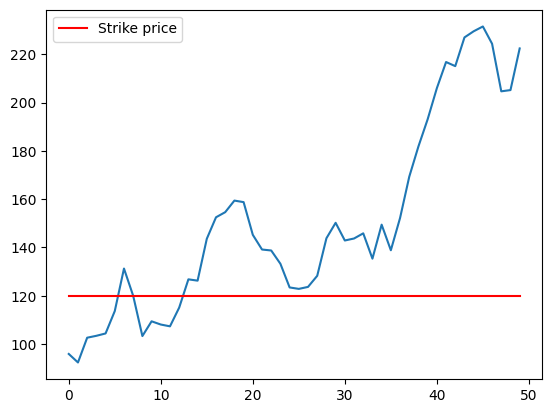

At this computation, the payoff is 0.0 the mean of the payoff is 30.152109242888663


In [425]:
W_0 = 0
m = 50
sigma = 1
S = GeometricBM_generator(W_0,m,S_0,sigma,r,T)

z = np.full(m,K, dtype=int)

plt.plot(S)
plt.plot(z, color = 'red', label = 'Strike price')
plt.legend()
plt.show()

print(f"At this computation, the payoff is {f(S,K,r,T)} the mean of the payoff is {I(S_0,K,r,sigma,T)}")

